In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset

In [3]:
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [13]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

In [6]:
#There are no null values

In [7]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
#Eda

In [12]:
df.shape

(30, 17)

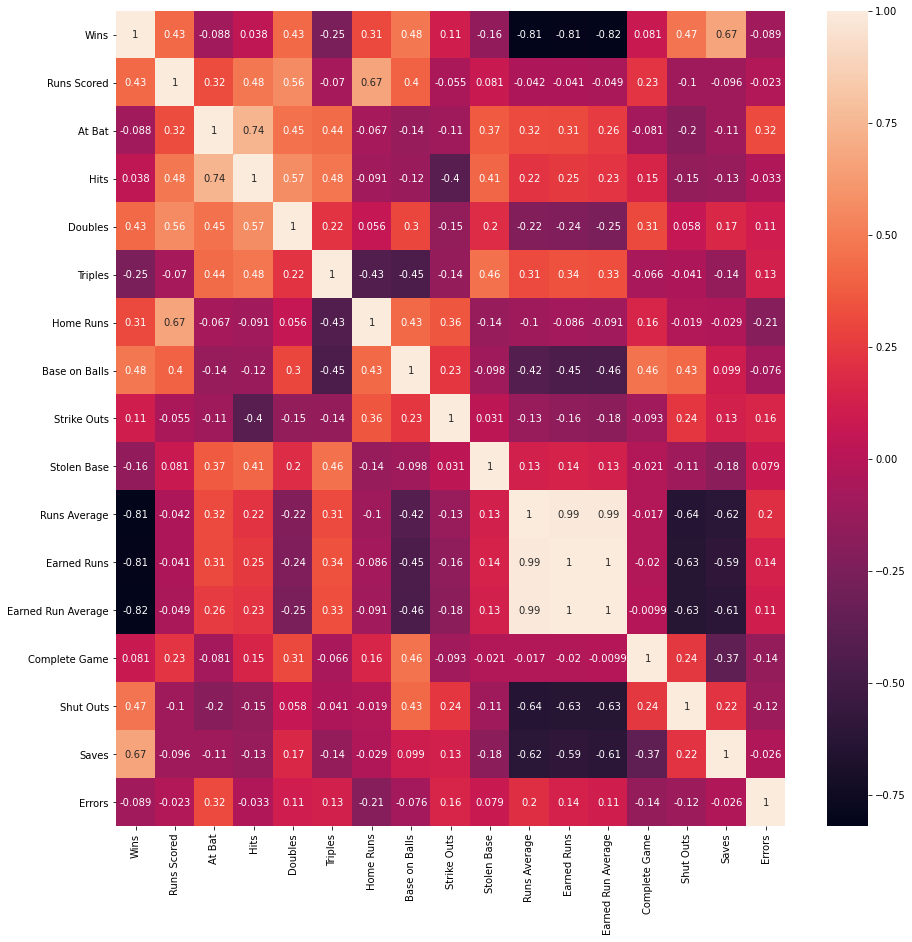

In [14]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

as we can see here that skewness of certain columns of dataset are out of acceptable range(+/-.5) it means some outlier must be present there that need to be treated.

In [17]:
x=df.drop('Wins',axis=1)
y=df['Wins']

In [ ]:
#Checking skewness and outliers.

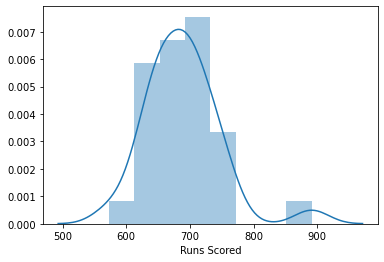

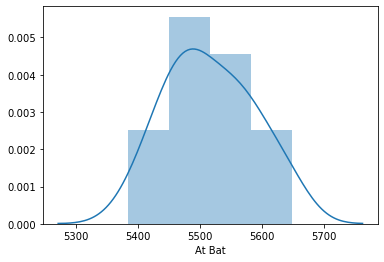

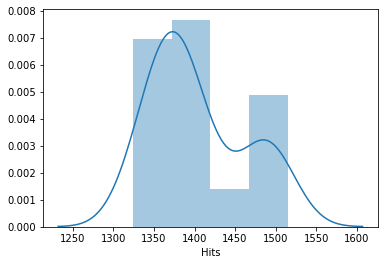

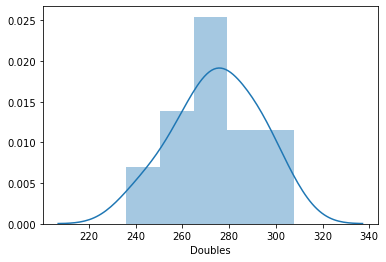

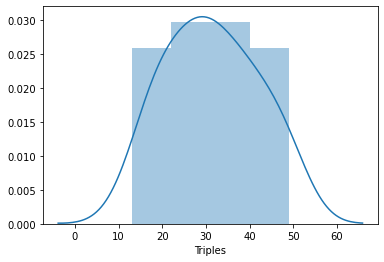

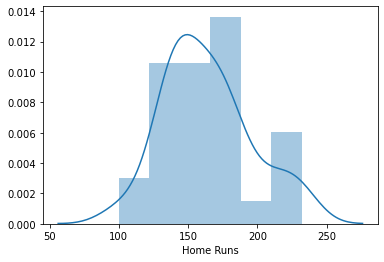

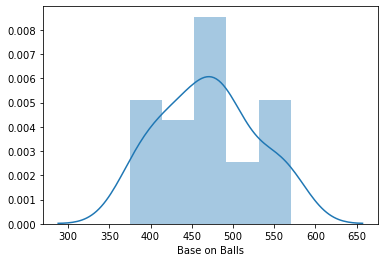

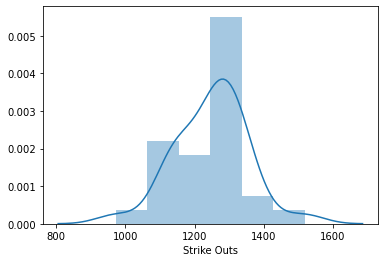

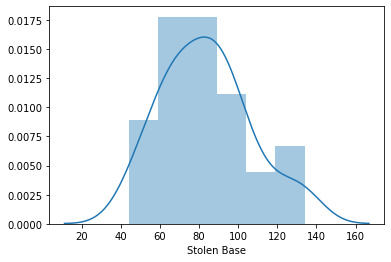

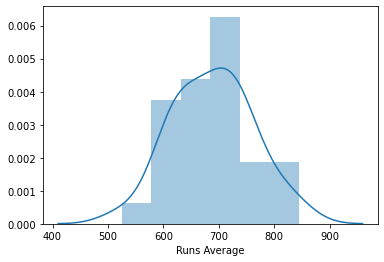

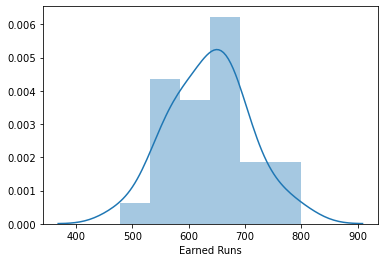

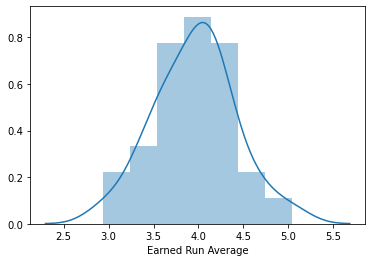

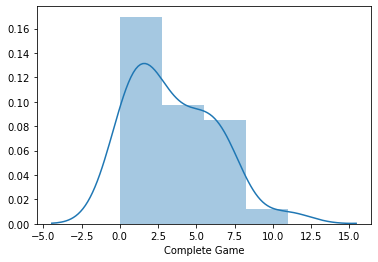

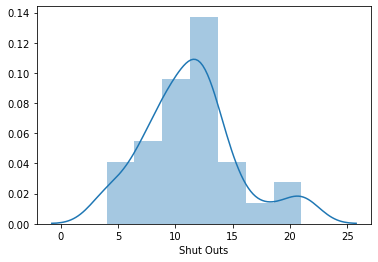

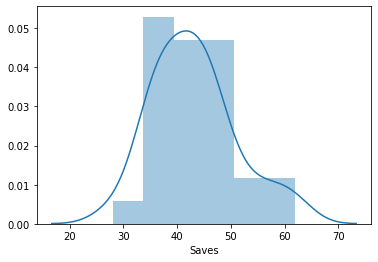

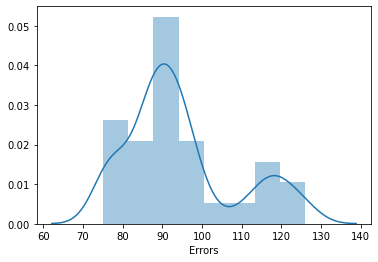

In [18]:
for i in x.describe().columns:
    sns.distplot(x[i].dropna())
    plt.show()

In [ ]:
#we can observe normal distribution in most of the plots

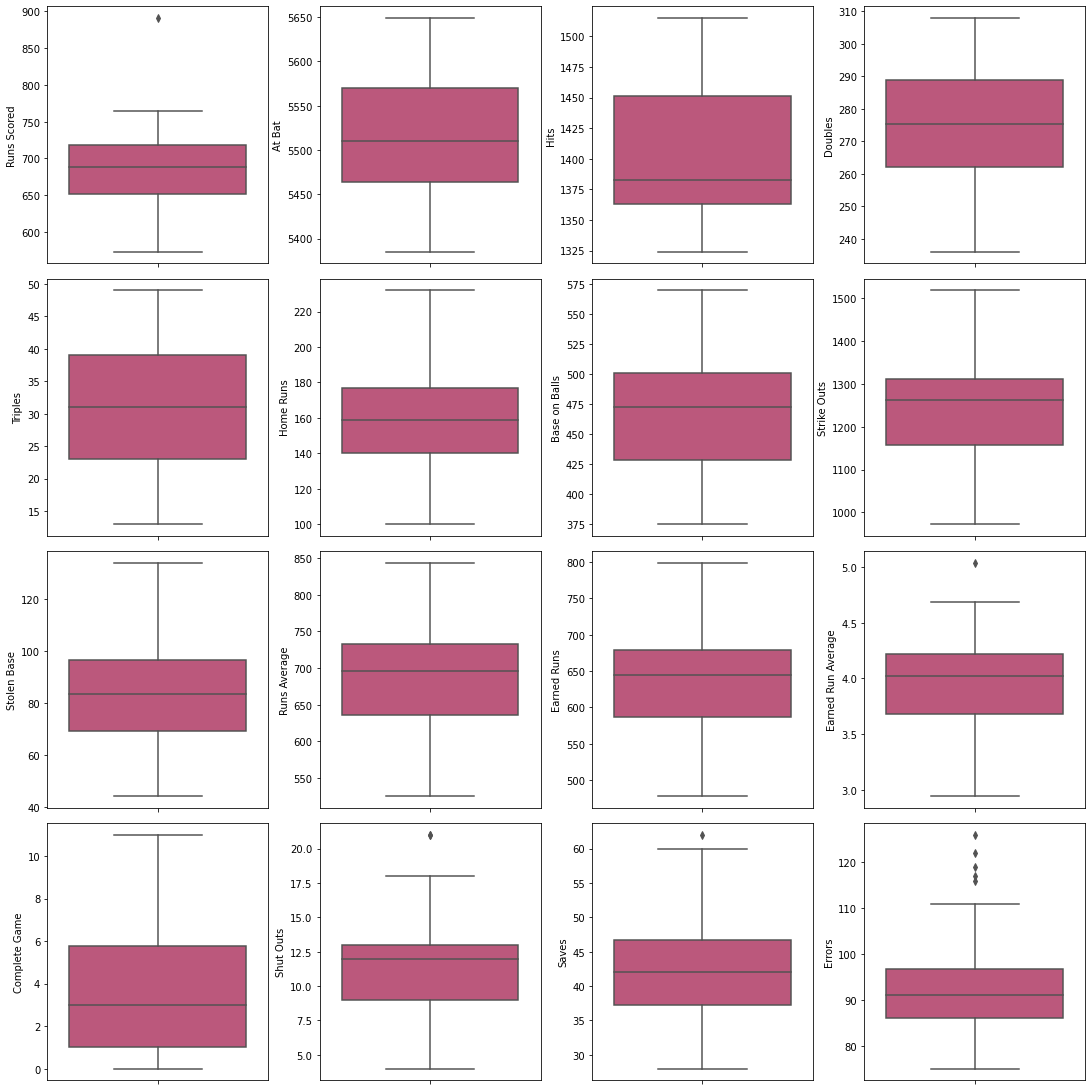

In [19]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

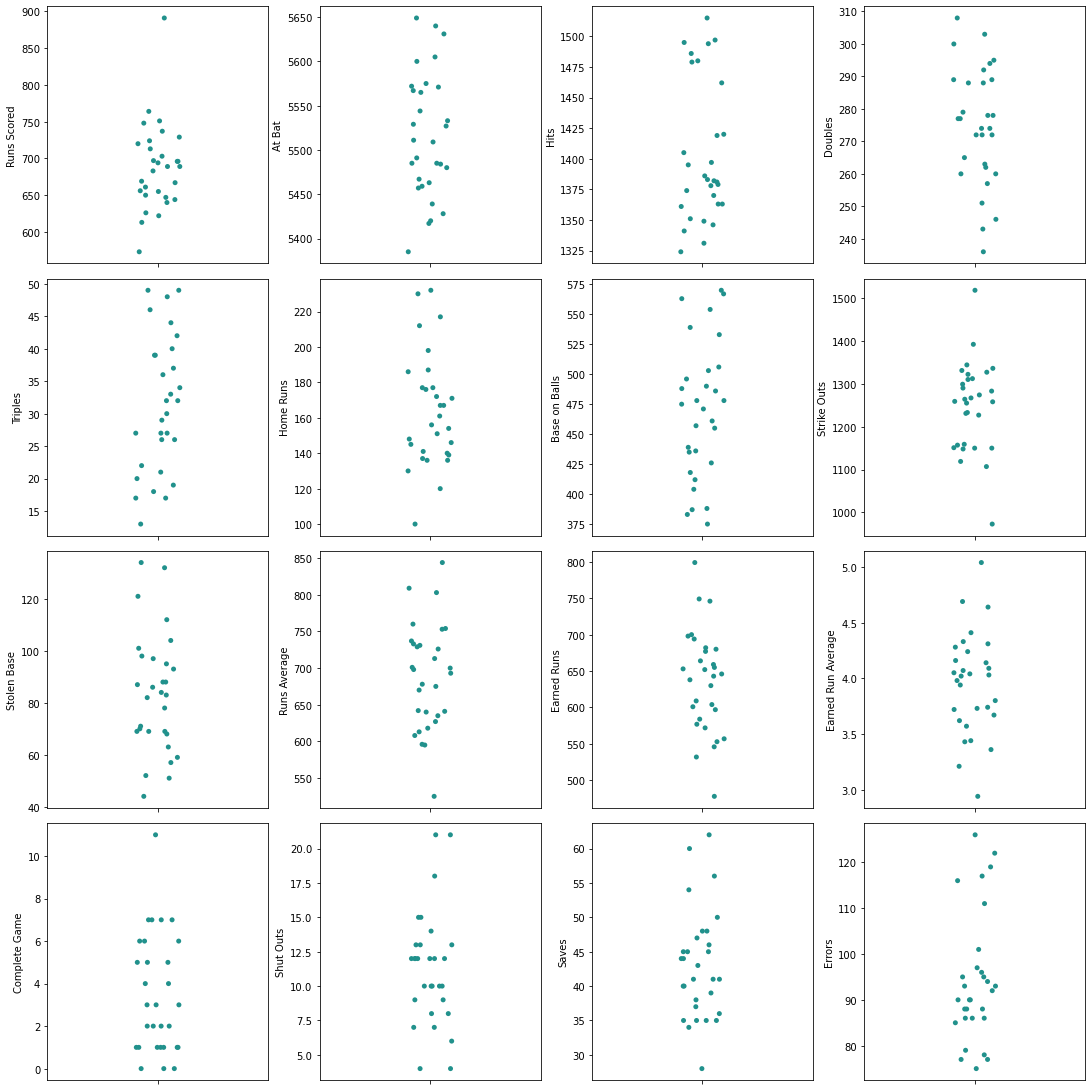

In [29]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

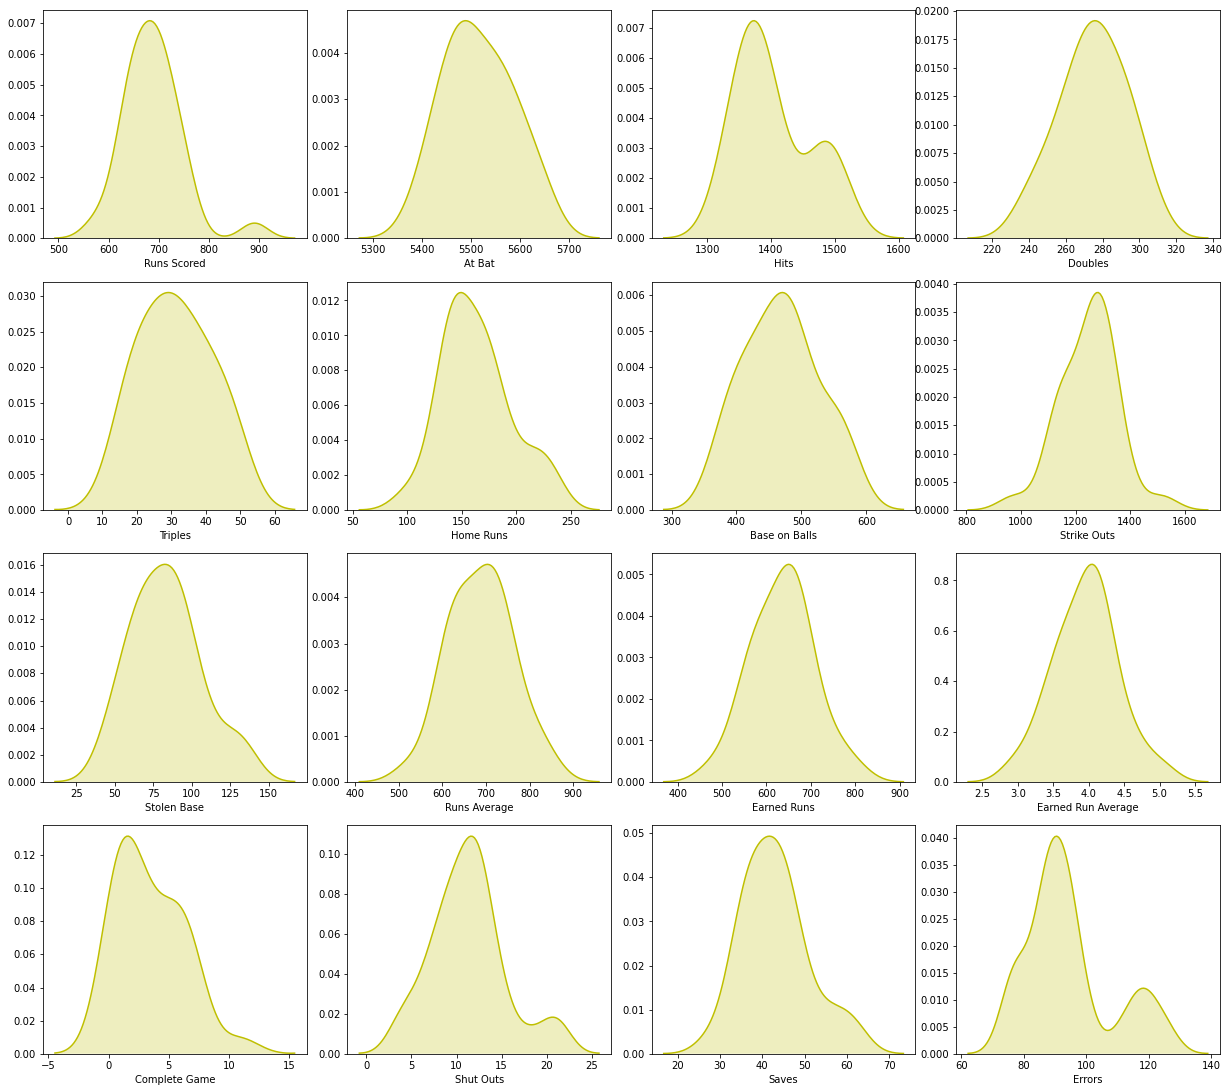

In [28]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

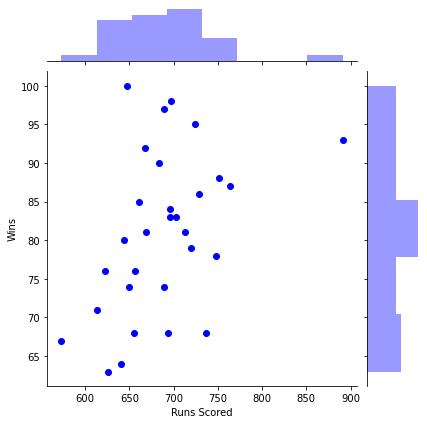

In [30]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="blue")

This graph describes relation between Wins (target) & Run scored.

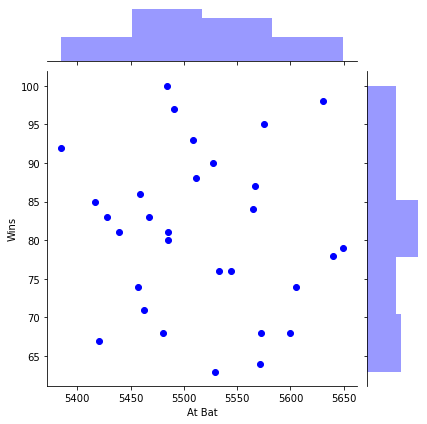

In [31]:
sns.jointplot(x="At Bat",y="Wins",data=df,color="blue")

in this jointplot we have observed wins are not dependent of the At Bat

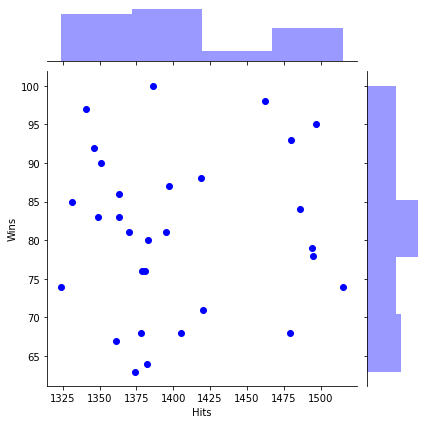

In [32]:
sns.jointplot(x="Hits",y="Wins",data=df,color="blue")

In the above plot we can observe that less the value of Hits more the chance of wins

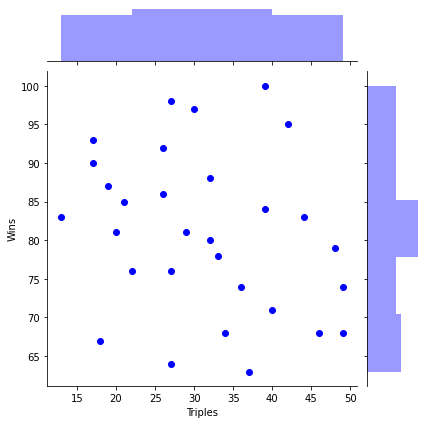

In [33]:
sns.jointplot(x="Triples",y="Wins",data=df,color="blue")
plt.show()

in this joint plot we cannot find any linear relation between wins and Triples

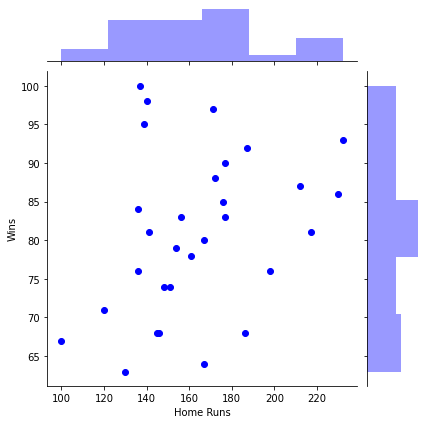

In [34]:
sns.jointplot(x="Home Runs",y="Wins",data=df,color="blue")

In the above graph showing as Home Runs increase ,chance of wins a bit increases

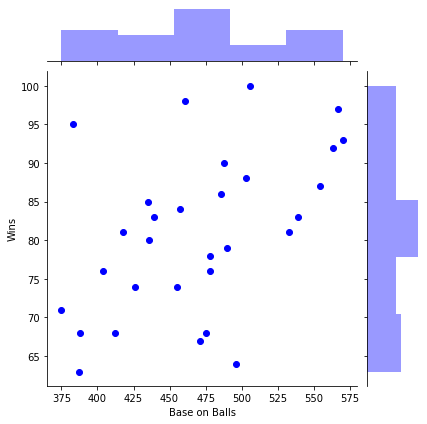

In [35]:
sns.jointplot(x="Base on Balls",y="Wins",data=df,color="blue")

Above graph explaining that if Base on Balls increase then wins chances also increases.

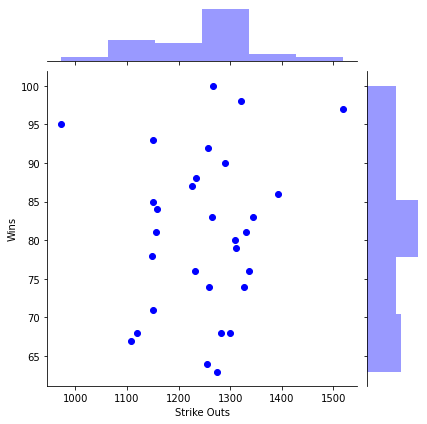

In [36]:
sns.jointplot(x="Strike Outs",y="Wins",data=df,color="blue")

Above graph is showing if Strike Outs stay between 1100 to 1400 then chances of wins is much higher

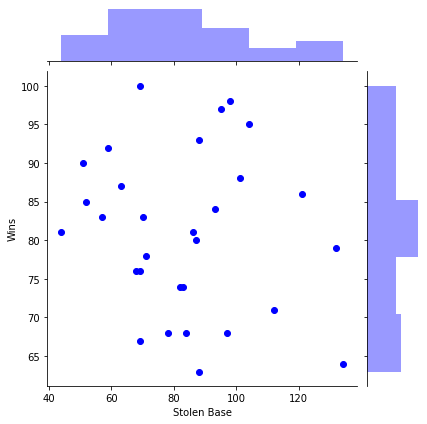

In [38]:
sns.jointplot(x="Stolen Base",y="Wins",data=df,color="blue")

Above plot tells the relation in such manner the Stolen Base between has negative impact on chances of Wins.

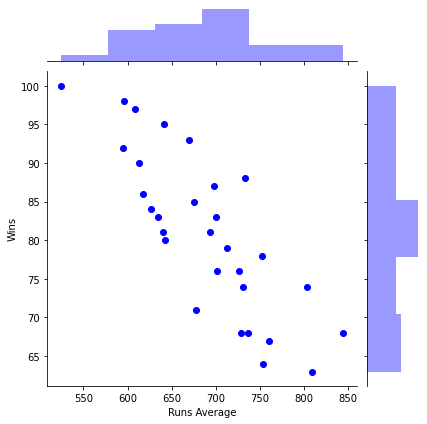

In [39]:
sns.jointplot(x="Runs Average",y="Wins",data=df,color="blue")

Above the graph showing Negative Relation between the Runs Average and wins

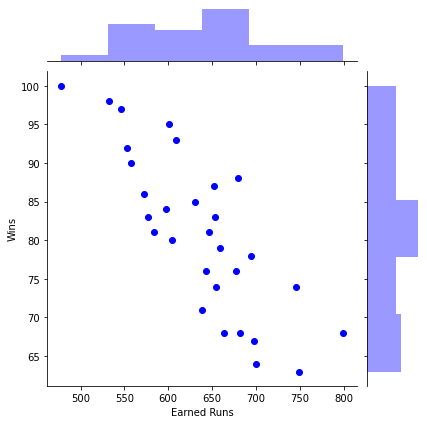

In [40]:
sns.jointplot(x="Earned Runs",y="Wins",data=df,color="blue")

Above observation shows a Negative relation between Earned Runs and Wins

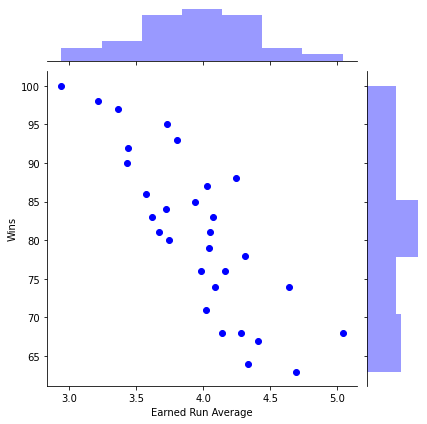

In [41]:
sns.jointplot(x="Earned Run Average",y="Wins",data=df,color="blue")

By the Above observation we can say that as Earned Run Average increase chances of wins decreases means this too is negatively related to each other.

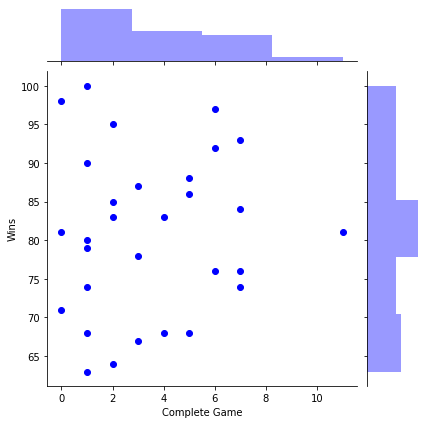

In [42]:
sns.jointplot(x="Complete Game",y="Wins",data=df,color="blue")

Above plot displaying that as increase complete Game,Wins also get increased

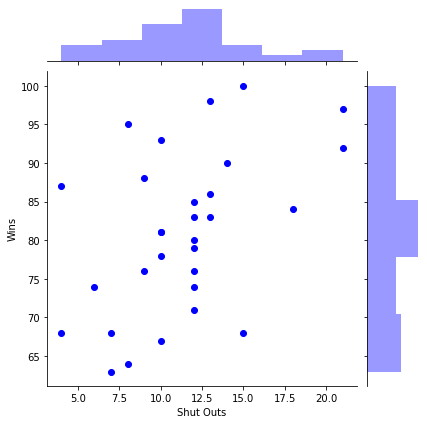

In [43]:
sns.jointplot(x="Shut Outs",y="Wins",data=df,color="blue")

Above displaying plot saying Wins and Shut Outs are positively related to each other

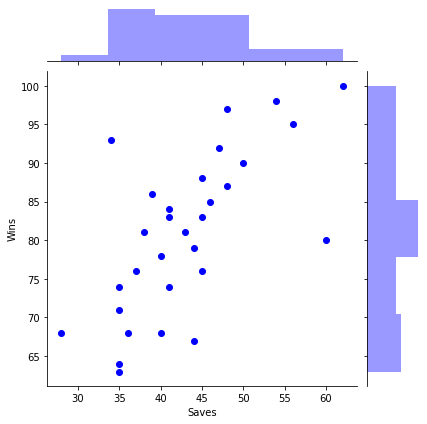

In [44]:
sns.jointplot(x="Saves",y="Wins",data=df,color="blue")

Above plot displaying Wins & Saves are positively related to each other

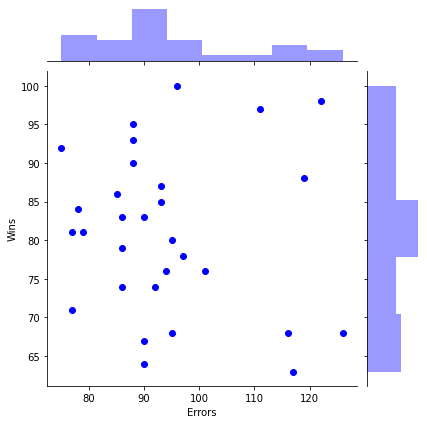

In [46]:
sns.jointplot(x="Errors",y="Wins",data=df,color="blue")
plt.show()

Above graph showing error is mostly present in the range of 70 to 100 which is badly impacted on Wins (target)

<Figure size 360x360 with 0 Axes>

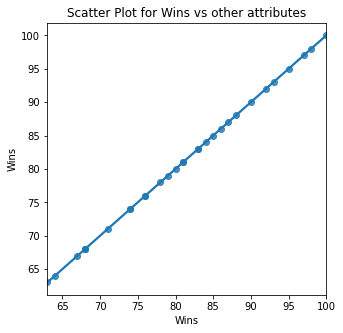

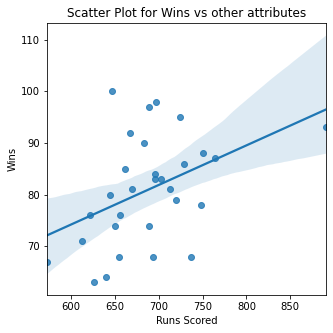

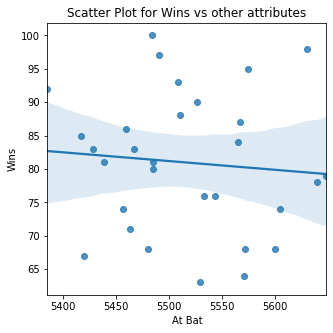

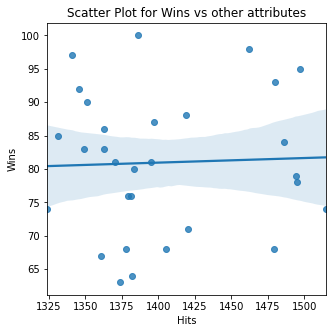

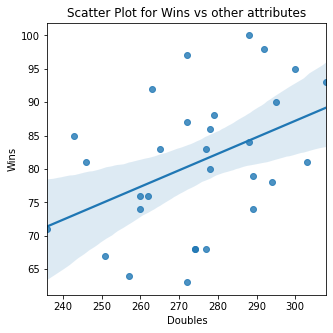

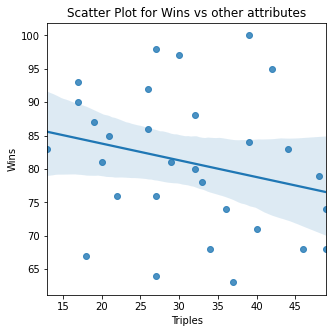

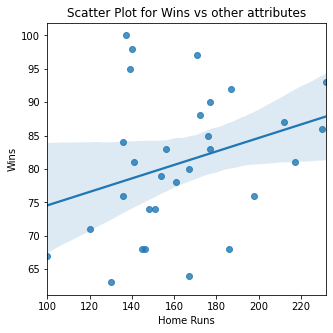

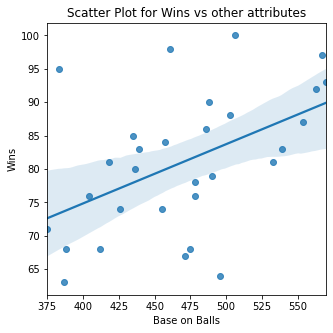

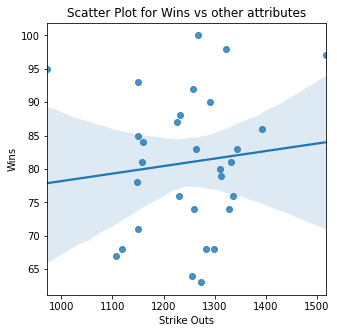

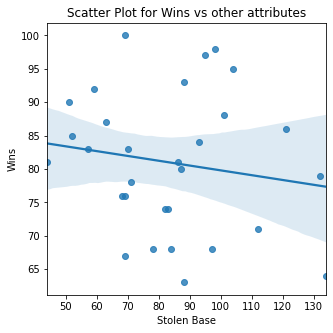

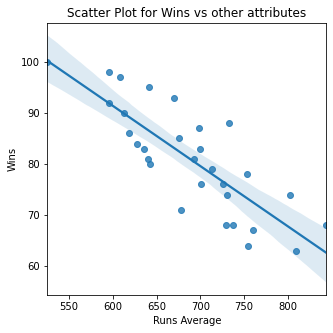

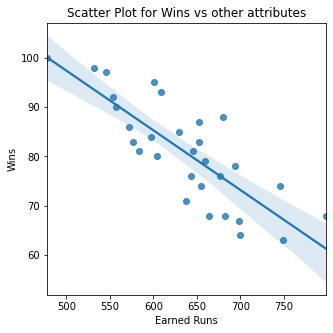

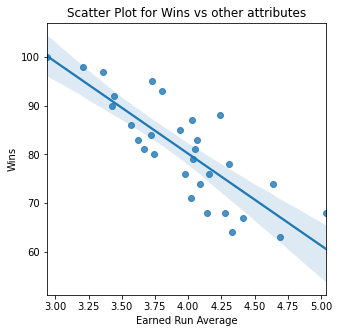

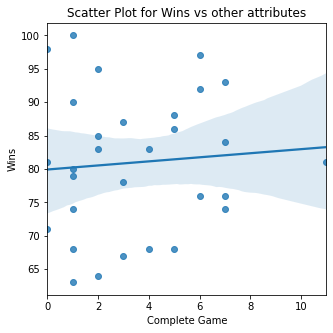

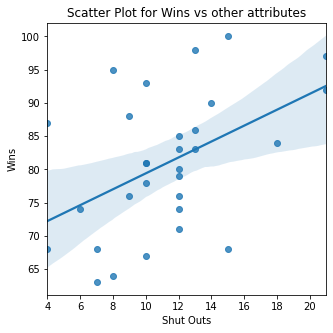

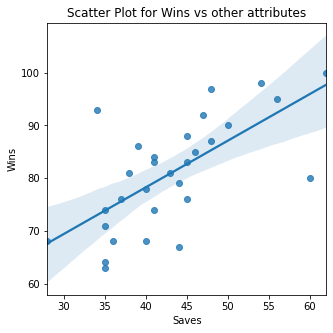

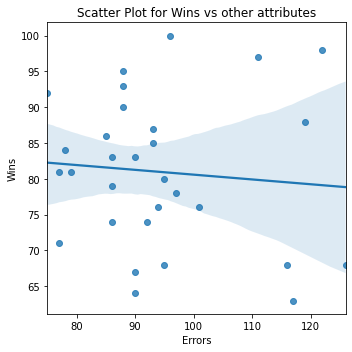

In [51]:
plt.figure(figsize = (5,5))
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (5,5))
        sns.regplot(df[column], df['Wins'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('Wins')
        
plt.tight_layout()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore') 

In [53]:
le=LinearRegression()

In [54]:
maxAcc=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('best r2_score:',maxAcc,'with random_state:',maxRS)

best r2_score: 0.8603360666735234 with random_state: 34


In [ ]:
#split and train the data

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [58]:
dr=DecisionTreeRegressor()
sv=SVR()
rf=RandomForestRegressor()

In [59]:
model=[le,dr,sv,rf]

In [60]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predv))
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

r2_score of LinearRegression() is:
0.8603360666735234
mean_squared_error: 17.704558856743976
mean_absolute_error: 2.8688844670398748
root_mean_squared_error 4.207678559104055


r2_score of DecisionTreeRegressor() is:
-0.10440202571094659
mean_squared_error: 140.0
mean_absolute_error: 10.0
root_mean_squared_error 11.832159566199232


r2_score of SVR() is:
-0.0231322330187278
mean_squared_error: 129.6977996127938
mean_absolute_error: 9.18004861054236
root_mean_squared_error 11.38849417670281


r2_score of RandomForestRegressor() is:
0.34332062719127365
mean_squared_error: 83.24424444444448
mean_absolute_error: 7.48
root_mean_squared_error 9.12382838749417




Linear regression is giving 86% accuracy

In [69]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    le.fit(x_train,y_train)
    le_predict_train=le.predict(x_train)
    le_predict_test=le.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,le_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,le_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9681348515901737
At random state0, The test accuracy is :-0.37037991932091086


At random state1, The training accuracy is :-0.9733856732704856
At random state1, The test accuracy is :-0.3306098436741298


At random state2, The training accuracy is :-0.9937308934727278
At random state2, The test accuracy is :--2.405551706592347


At random state3, The training accuracy is :-0.9733765745975086
At random state3, The test accuracy is :-0.5683741160452876


At random state4, The training accuracy is :-0.966406603886936
At random state4, The test accuracy is :-0.2868296038003545


At random state5, The training accuracy is :-0.9508521861901348
At random state5, The test accuracy is :-0.735992571317985


At random state6, The training accuracy is :-0.9489496261745088
At random state6, The test accuracy is :-0.8374394125305696


At random state7, The training accuracy is :-0.9695004701946721
At random state7, The test accuracy is :-0.044069067737

At random state71, The training accuracy is :-0.9637240272813788
At random state71, The test accuracy is :-0.643221389167941


At random state72, The training accuracy is :-0.9601096495985681
At random state72, The test accuracy is :-0.6538792585277056


At random state73, The training accuracy is :-0.9669925286301082
At random state73, The test accuracy is :-0.7588143235862912


At random state74, The training accuracy is :-0.9831064870733234
At random state74, The test accuracy is :--2.087143301705894


At random state75, The training accuracy is :-0.971462231373198
At random state75, The test accuracy is :--0.22985682903375815


At random state76, The training accuracy is :-0.9827505071957378
At random state76, The test accuracy is :--0.4662073722031146


At random state77, The training accuracy is :-0.9839475839684568
At random state77, The test accuracy is :-0.5751823954195511


At random state78, The training accuracy is :-0.9611890730348733
At random state78, The test accuracy i

In [61]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [62]:
ls=ElasticNet(alpha=10)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predis=ls.predict(x_test)
print(r2_score(y_test,predis))
print('mean_squared_error:',mean_squared_error(y_test,predis))
print('mean_absolute_error:',mean_absolute_error(y_test,predis))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predis)))

0.8559470333126206
mean_squared_error: 18.260936567234715
mean_absolute_error: 3.0756909486977455
root_mean_squared_error 4.273281709323025


In [63]:
lt=Lasso(alpha=0.001)
lt.fit(x_train,y_train)
lt.score(x_train,y_train)
predi=ls.predict(x_test)
print(r2_score(y_test,predi))
print('mean_squared_error:',mean_squared_error(y_test,predi))
print('mean_absolute_error:',mean_absolute_error(y_test,predi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predi)))

0.8559470333126206
mean_squared_error: 18.260936567234715
mean_absolute_error: 3.0756909486977455
root_mean_squared_error 4.273281709323025


In [64]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pedi=rd.predict(x_test)
print(r2_score(y_test,pedi))
print('mean_squared_error:',mean_squared_error(y_test,pedi))
print('mean_absolute_error:',mean_absolute_error(y_test,pedi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,pedi)))

0.8502544758079957
mean_squared_error: 18.982556079055552
mean_absolute_error: 3.09009058589458
root_mean_squared_error 4.35689752909746


In [70]:
#saving model

In [73]:
import joblib

In [75]:
joblib.dump(le,"Base_ball.pkl")

['Base_ball.pkl']